In [31]:
# create Vgg16 model

import numpy as np
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D

vgg_mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape((1,1,3)) # BGR

def vgg_preprocess(x):
    x = x - vgg_mean 
    return x

model = Sequential()
model.add(Lambda(vgg_preprocess, input_shape=(224,224,3), output_shape=(224,224,3)))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))


# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# FC blocks
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

# load weights
fname = 'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
FILE_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/'
model.load_weights(get_file(fname, FILE_PATH+fname, cache_subdir='models'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [32]:
# remove last layer from model
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [33]:
# set all layers to trainable false
for layer in model.layers: layer.trainable=False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [34]:
# add only 2 classes
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
__________

Found 40 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


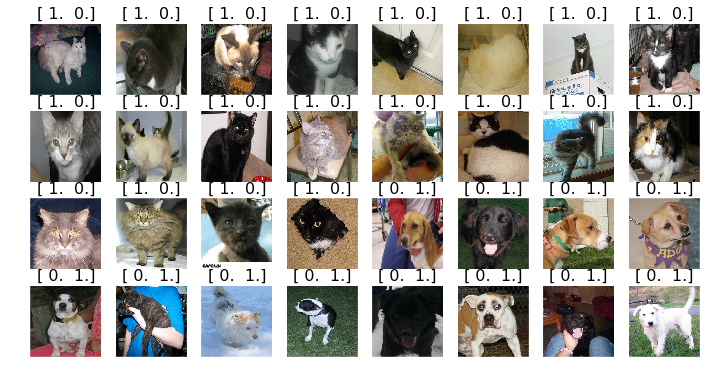

In [35]:
# Now, start working on the data
# data location (a small sample of it)
path = '/home/ubuntu/fastai/courses/deeplearning1/nbs/data/dogscats/sample/'
model_path = path + 'models/'

%matplotlib inline

# setting batch_size to 32 and continuing normaly
batch_size = 32

from fcn_utils import get_batches, get_data, plots

val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)
trn_batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)

# trying to understand how the batches are constructed
val_imgs, val_labels = next(val_batches) 
plots(val_imgs, titles=val_labels, figsize=(12,6), rows = 4) # plot 'batch_size = 32' images

In [36]:
# target_size=(224,224)

val_data = get_data(path+'valid') # extract the 'real' data from batches
trn_data = get_data(path+'train')

Found 40 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [37]:
from sklearn.preprocessing import OneHotEncoder

def onehot(x):
      return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())
    
val_classes = val_batches.classes
trn_classes = trn_batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)


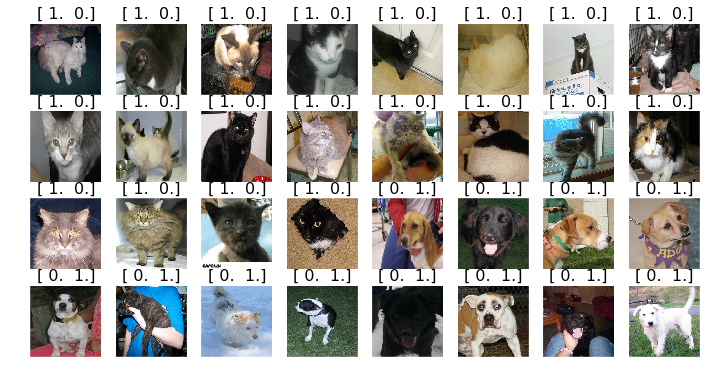

In [38]:
from keras.preprocessing import image

gen = image.ImageDataGenerator()
trn_batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False) # this does not touch the validation data

# trying to understand how the batches are constructed
val_imgs, val_labels = next(val_batches) 
plots(val_imgs, titles=val_labels, figsize=(12,6), rows = 4) # plot 'batch_size = 32' images

def fit_model(model, trn_batches, val_batches, nb_epoch=1):
      model.fit_generator(trn_batches, samples_per_epoch=trn_batches.n, nb_epoch=nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.n)


In [39]:
from keras.optimizers import SGD, RMSprop, Adam
# from multi_gpu import make_parallel, get_available_gpus

# available_gpus = get_available_gpus()
# print available_gpus
# model = make_parallel(model, available_gpus)
opt = Adam(lr = 1e-2)#SGD(lr=1e-3, momentum=0.9)#RMSprop(lr=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
fit_model(model, trn_batches, val_batches, nb_epoch=50)        

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=6, epochs=50, validation_steps=40)`
  if sys.path[0] == '':


Epoch 1/50
6/6 [==============================] - 36s - loss: 0.6510 - acc: 0.8438 - val_loss: 0.6090 - val_acc: 0.9750
Epoch 2/50
6/6 [==============================] - 34s - loss: 0.6012 - acc: 0.9362 - val_loss: 0.5712 - val_acc: 0.9500
Epoch 3/50
6/6 [==============================] - 34s - loss: 0.5427 - acc: 0.9841 - val_loss: 0.5200 - val_acc: 0.9750
Epoch 4/50
6/6 [==============================] - 34s - loss: 0.4965 - acc: 0.9947 - val_loss: 0.4965 - val_acc: 0.9250
Epoch 5/50
6/6 [==============================] - 34s - loss: 0.4479 - acc: 0.9947 - val_loss: 0.4296 - val_acc: 0.9750
Epoch 6/50
6/6 [==============================] - 34s - loss: 0.3974 - acc: 1.0000 - val_loss: 0.3856 - val_acc: 0.9750
Epoch 7/50
6/6 [==============================] - 34s - loss: 0.3613 - acc: 0.9947 - val_loss: 0.3524 - val_acc: 0.9750
Epoch 8/50
6/6 [==============================] - 35s - loss: 0.3254 - acc: 0.9948 - val_loss: 0.3476 - val_acc: 0.9500
Epoch 9/50
6/6 [========================